In [43]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
# Cargar el archivo de Excel
df = pd.read_excel('Datos_1.xlsx', sheet_name = 'frame_section_assigments')

# Ordenar el DataFrame por la columna 'Story' en orden ascendente
df['Story'] = pd.Categorical(df['Story'], categories=[f'STORY{i}' for i in range(11, 0, -1)], ordered=True)
df = df.sort_values('Story')





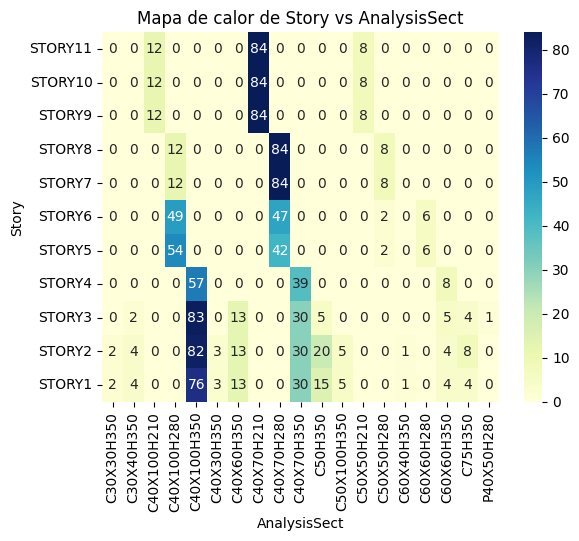

In [48]:
# Analsis Bivariado

# Se procede a revisar la relación entre dos variables categoricas del dataset por medio de una tabla de contingencia
pd.crosstab(df['Story'], df['AnalysisSect'])

# Visualización 
crosstab = pd.crosstab(df['Story'], df['AnalysisSect'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de calor de Story vs AnalysisSect')
plt.show()



In [49]:
# Analisis de correlación para variables categoricas

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return (chi2 / (n * (min(k, r) - 1))) ** 0.5

cramers_v(df['Story'], df['AnalysisSect'])


np.float64(0.4851417670288928)

Para el análisis bivariado, se decidió trabajar con las variables ‘Story’ y ‘AnalysisSect’, ya que estas permiten conocer las secciones de columnas consideradas por cada una de las losas en las cuatro estructuras en estudio.

Del análisis se puede concluir lo siguiente: las columnas con sección de 40 cm x 100 cm y una resistencia de concreto de 350 kgf/cm² son las más utilizadas en los cuatro primeros niveles de las estructuras; las columnas con sección de 40 cm x 100 cm y una resistencia de concreto de 280 kgf/cm² son las más utilizadas entre los niveles cinco y seis; las columnas con sección de 40 cm x 70 cm y una resistencia de concreto de 280 kgf/cm² son las más utilizadas entre los niveles siete y ocho; y las columnas con sección de 40 cm x 70 cm y una resistencia de concreto de 210 kgf/cm² son las más utilizadas entre los niveles nueve y once.

Además, se realizó una correlación de Cramér, la cual mide la correlación entre variables categóricas, y esta nos dio un valor de 0.485, indicando que las variables tienen una asociación media y son relevantes para el estudio

